In [2]:
import pandas as pd
import numpy as np
import os
import pickle
import datetime
from datetime import date
from datetime import datetime
from sklearn.model_selection import train_test_split
from itertools import combinations_with_replacement
from itertools import combinations
from itertools import permutations
from itertools import product 
import random
import csv
import matplotlib.mlab as mlab
import scipy.linalg as lng # linear algebra from scipy library
import matplotlib . pyplot as plt # library for plots
import matplotlib.animation as animation # lets animate the plots!
from matplotlib.pyplot import figure
import time


In [3]:
import matplotlib.font_manager
plt.rcParams["font.family"] = "Times New Roman"

In [4]:
# setting saving directory
today = date.today()
now = datetime.now()
print (today)
print (now)
dt_string = now.strftime("%d-%m-%Y_%H-%M-%S") #do not put : or similar 
print("date and time =", dt_string)	    
root = "C:/Users/arita/Documents/private/Data Engineering/2semestre/Stochastic_modeling/Project/data/outputs"
#'/content/drive/My Drive/02443-Stochastic Simulation/Project/data_stochastic_modeling'

#saving function
def saveAsCSV(df,name,rootdir = root):
    """
    df = dataframe
    name = name for saving in format: 'thisisthename.csv'
    rootdir = local saving directory, default is root
    """
    dt_string = now.strftime("%d-%m-%Y_%H-%M-%S")
    savepath = rootdir +'/' + dt_string+'_'+ name 
    df.to_csv ( savepath, index = False, header=True)

#loading function
def loadCSV(name,rootdir = root):
    """
    rootdir = local saving directory, default is root
    name = exact name (including datetime and extention .csv)
    """
    loadpath = rootdir +'/'+ name 
    print ("loading: ",loadpath)
    df = pd.read_csv(loadpath)
    return df


2020-06-24
2020-06-24 08:00:01.559120
date and time = 24-06-2020_08-00-01


In [5]:
from google.colab import drive
drive.mount('/content/drive')
 
!ls "/content/drive/My Drive"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
'02285- AI and Multi Agent Systems'   Documents
'02443-Stochastic Simulation'	     'Documents (old stuff)'
 02582-ComputationalDataAnalysis      Google
'42634- X tech Entrepreneurship'     'Model Outputs'
 Booklet.docx			      Pictures
'Colab Notebooks'		      pictures_presentation
'DeepMinds-v2.zip (Unzipped Files)'   presentazioni
'DeepMinds.zip (Unzipped Files)'      VIT


In [6]:
folder = "/content/drive/My Drive/02443-Stochastic Simulation/Project/data_stochastic_modeling"

os.chdir(folder)
os.getcwd()
#os.chdir('C:\\Users\\arita\\Documents\\GitHub\\02443-SimSolarEnergy\\code\\tm')

'/content/drive/My Drive/02443-Stochastic Simulation/Project/data_stochastic_modeling'

In [7]:
time_converter_df = loadCSV('23-06-2020_08-56-23_time_converter_df.csv',folder)

loading:  /content/drive/My Drive/02443-Stochastic Simulation/Project/data_stochastic_modeling/23-06-2020_08-56-23_time_converter_df.csv


# Loading Files


### loading 1 : for new splitted df

In [8]:
#change load directory 
#os.chdir('C:\\Users\\arita\\Documents\\GitHub\\02443-SimSolarEnergy\\code\\labels')

#unpickle lists
with open('P_t_labels.pkl','rb') as f:
    P_t_labels = pickle.load(f)
    
with open( 'splitDF_labels.pkl','rb') as f:
    splitDF_labels = pickle.load(f)


In [9]:
P_t_labels.sort()

newP_t_labels = []
for label in P_t_labels:
    newlabel = label[20:-4]
    #print(newlabel)
    newP_t_labels.append(newlabel)

P_t_labels = newP_t_labels

In [10]:
P_t_labels = P_t_labels[12:25]

In [19]:
#change load directory 
#os.chdir('C:\\Users\\arita\\Documents\\GitHub\\02443-SimSolarEnergy\\code\\tm')
#folder = 'C:\\Users\\arita\\Documents\\GitHub\\02443-SimSolarEnergy\\code\\tm'

#search for files
date = '22-06-2020_21-30-03'
extention = 'pkl'
#check last files produced
filelist = [file for file in os.listdir(folder) if (file.startswith(date)  & file.endswith(extention))]
np.sort(filelist)

array(['22-06-2020_21-30-03_P_t_testdf_adult1_weekdays.pkl',
       '22-06-2020_21-30-03_P_t_testdf_adult1_weekend.pkl',
       '22-06-2020_21-30-03_P_t_testdf_adult2_weekdays.pkl',
       '22-06-2020_21-30-03_P_t_testdf_adult2_weekend.pkl',
       '22-06-2020_21-30-03_P_t_testdf_adult3_weekdays.pkl',
       '22-06-2020_21-30-03_P_t_testdf_adult3_weekend.pkl',
       '22-06-2020_21-30-03_P_t_testdf_adult4_weekdays.pkl',
       '22-06-2020_21-30-03_P_t_testdf_adult4_weekend.pkl',
       '22-06-2020_21-30-03_P_t_testdf_child_weekdays.pkl',
       '22-06-2020_21-30-03_P_t_testdf_child_weekend.pkl',
       '22-06-2020_21-30-03_P_t_testdf_senior_weekdays.pkl',
       '22-06-2020_21-30-03_P_t_testdf_senior_weekend.pkl',
       '22-06-2020_21-30-03_P_t_traindf_adult1_weekdays.pkl',
       '22-06-2020_21-30-03_P_t_traindf_adult1_weekend.pkl',
       '22-06-2020_21-30-03_P_t_traindf_adult2_weekdays.pkl',
       '22-06-2020_21-30-03_P_t_traindf_adult2_weekend.pkl',
       '22-06-2020_21-30-03_P_

In [20]:
#and unpickle them!
    
with open( '22-06-2020_21-30-03_P_t_traindf_adult1_weekdays.pkl','rb') as f:
    P_t_traindf_adult1_weekdays = pickle.load(f)    
with open( '22-06-2020_21-30-03_P_t_traindf_adult1_weekend.pkl','rb') as f:   
    P_t_traindf_adult1_weekend= pickle.load(f)
    
with open( '22-06-2020_21-30-03_P_t_traindf_adult2_weekdays.pkl','rb') as f:
    P_t_traindf_adult2_weekdays = pickle.load(f)  
with open( '22-06-2020_21-30-03_P_t_traindf_adult2_weekend.pkl','rb') as f:   
    P_t_traindf_adult2_weekend= pickle.load(f)
    
with open( '22-06-2020_21-30-03_P_t_traindf_adult3_weekdays.pkl','rb') as f:
    P_t_traindf_adult3_weekdays = pickle.load(f)   
with open( '22-06-2020_21-30-03_P_t_traindf_adult3_weekend.pkl','rb') as f:   
    P_t_traindf_adult3_weekend= pickle.load(f)
    
with open( '22-06-2020_21-30-03_P_t_traindf_adult4_weekdays.pkl','rb') as f:
    P_t_traindf_adult4_weekdays = pickle.load(f)
with open( '22-06-2020_21-30-03_P_t_traindf_adult4_weekend.pkl','rb') as f:   
    P_t_traindf_adult4_weekend= pickle.load(f)

with open( '22-06-2020_21-30-03_P_t_traindf_child_weekdays.pkl','rb') as f:
    P_t_traindf_child_weekdays = pickle.load(f)
with open( '22-06-2020_21-30-03_P_t_traindf_child_weekend.pkl','rb') as f:   
    P_t_traindf_child_weekend= pickle.load(f)

with open( '22-06-2020_21-30-03_P_t_traindf_senior_weekdays.pkl','rb') as f:
    P_t_traindf_senior_weekdays = pickle.load(f)
with open( '22-06-2020_21-30-03_P_t_traindf_senior_weekend.pkl','rb') as f:   
    P_t_traindf_senior_weekend= pickle.load(f)
    

In [21]:
# we will use only the transition matrices of the training set

all_week_P_t = [P_t_traindf_adult1_weekdays,
 P_t_traindf_adult1_weekend,
 P_t_traindf_adult2_weekdays,
 P_t_traindf_adult2_weekend,
 P_t_traindf_adult3_weekdays,
 P_t_traindf_adult3_weekend,
 P_t_traindf_adult4_weekdays,
 P_t_traindf_adult4_weekend,
 P_t_traindf_child_weekdays,
 P_t_traindf_child_weekend,
 P_t_traindf_senior_weekdays,
 P_t_traindf_senior_weekend]

In [24]:
#loading new test sets for validation
test_df_child_weekdays = loadCSV('22-06-2020_21-30-03_testdf_child_weekdays.csv',folder)
test_df_child_weekend = loadCSV('22-06-2020_21-30-03_testdf_child_weekend.csv',folder)

test_df_adult1_weekdays  = loadCSV('22-06-2020_21-30-03_testdf_adult1_weekdays.csv',folder)
test_df_adult1_weekend   = loadCSV('22-06-2020_21-30-03_testdf_adult1_weekend.csv',folder)

test_df_adult2_weekdays  = loadCSV('22-06-2020_21-30-03_testdf_adult2_weekdays.csv',folder)
test_df_adult2_weekend   = loadCSV('22-06-2020_21-30-03_testdf_adult2_weekend.csv',folder)

test_df_adult3_weekdays  = loadCSV('22-06-2020_21-30-03_testdf_adult3_weekdays.csv',folder)
test_df_adult3_weekend   = loadCSV('22-06-2020_21-30-03_testdf_adult3_weekend.csv',folder)

test_df_adult4_weekdays  = loadCSV('22-06-2020_21-30-03_testdf_adult4_weekdays.csv',folder)
test_df_adult4_weekend   = loadCSV('22-06-2020_21-30-03_testdf_adult4_weekend.csv',folder)

test_df_senior_weekdays  = loadCSV('22-06-2020_21-30-03_testdf_senior_weekdays.csv',folder)
test_df_senior_weekdays  = loadCSV('22-06-2020_21-30-03_testdf_senior_weekend.csv',folder)

loading:  /content/drive/My Drive/02443-Stochastic Simulation/Project/data_stochastic_modeling/22-06-2020_21-30-03_testdf_child_weekdays.csv
loading:  /content/drive/My Drive/02443-Stochastic Simulation/Project/data_stochastic_modeling/22-06-2020_21-30-03_testdf_child_weekend.csv
loading:  /content/drive/My Drive/02443-Stochastic Simulation/Project/data_stochastic_modeling/22-06-2020_21-30-03_testdf_adult1_weekdays.csv
loading:  /content/drive/My Drive/02443-Stochastic Simulation/Project/data_stochastic_modeling/22-06-2020_21-30-03_testdf_adult1_weekend.csv
loading:  /content/drive/My Drive/02443-Stochastic Simulation/Project/data_stochastic_modeling/22-06-2020_21-30-03_testdf_adult2_weekdays.csv
loading:  /content/drive/My Drive/02443-Stochastic Simulation/Project/data_stochastic_modeling/22-06-2020_21-30-03_testdf_adult2_weekend.csv
loading:  /content/drive/My Drive/02443-Stochastic Simulation/Project/data_stochastic_modeling/22-06-2020_21-30-03_testdf_adult3_weekdays.csv
loading:  /

In [25]:
#collect them and their labels
all_week_test_df = [test_df_adult1_weekdays,
test_df_adult1_weekend,
test_df_adult2_weekdays,
test_df_adult2_weekend,
test_df_adult3_weekdays,
test_df_adult3_weekend,
test_df_adult4_weekdays,
test_df_adult4_weekend,
test_df_child_weekdays,
test_df_child_weekend,                   
test_df_senior_weekdays,
test_df_senior_weekdays]

all_week_test_df_labels = ['test_df_adult1_weekdays',
'test_df_adult1_weekend',
'test_df_adult2_weekdays',
'test_df_adult2_weekend',
'test_df_adult3_weekdays',
'test_df_adult3_weekend',
'test_df_adult4_weekdays',
'test_df_adult4_weekend',
'test_df_senior_weekdays',
'test_df_senior_weekdays']

### loading 2: for df split only on age

In [11]:
os.getcwd()

'/content/drive/My Drive/02443-Stochastic Simulation/Project/data_stochastic_modeling'

In [12]:
#os.getcwd()
#folder = 'C:\\Users\\arita\\Documents\\GitHub\\02443-SimSolarEnergy\\code\\tm'
#os.chdir('C:\\Users\\arita\\Documents\\GitHub\\02443-SimSolarEnergy\\code\\tm')
#os.chdir(folder)

In [13]:
folder = "/content/drive/My Drive/02443-Stochastic Simulation/Project/data_stochastic_modeling"

os.chdir(folder)

In [14]:
#loading test sets for validation
test_df_child = loadCSV('21-06-2020_11-20-39_test_df_child.csv',folder)
test_df_adult1 = loadCSV('21-06-2020_11-20-39_test_df_adult1.csv',folder)
test_df_adult2 = loadCSV('21-06-2020_11-20-39_test_df_adult2.csv',folder)
test_df_adult3 = loadCSV('21-06-2020_11-20-39_test_df_adult3.csv',folder)
test_df_adult4 = loadCSV('21-06-2020_11-20-39_test_df_adult4.csv',folder)
test_df_senior = loadCSV('21-06-2020_11-20-39_test_df_senior.csv',folder)


loading:  /content/drive/My Drive/02443-Stochastic Simulation/Project/data_stochastic_modeling/21-06-2020_11-20-39_test_df_child.csv
loading:  /content/drive/My Drive/02443-Stochastic Simulation/Project/data_stochastic_modeling/21-06-2020_11-20-39_test_df_adult1.csv
loading:  /content/drive/My Drive/02443-Stochastic Simulation/Project/data_stochastic_modeling/21-06-2020_11-20-39_test_df_adult2.csv
loading:  /content/drive/My Drive/02443-Stochastic Simulation/Project/data_stochastic_modeling/21-06-2020_11-20-39_test_df_adult3.csv
loading:  /content/drive/My Drive/02443-Stochastic Simulation/Project/data_stochastic_modeling/21-06-2020_11-20-39_test_df_adult4.csv
loading:  /content/drive/My Drive/02443-Stochastic Simulation/Project/data_stochastic_modeling/21-06-2020_11-20-39_test_df_senior.csv


In [15]:
#collect them and their labels
all_test_df = [test_df_child,test_df_adult1,test_df_adult2,test_df_adult3,test_df_adult4,test_df_senior]
all_test_df_labels = ['test_df_child','test_df_adult1','test_df_adult2','test_df_adult3','test_df_adult4','test_df_senior']

In [16]:
#unpickle 3D matrix P_t previously saved
    
with open('23-06-2020_09-18-48_P_t_child.pkl','rb') as f:
    P_t_child = pickle.load(f)
    
with open( '23-06-2020_09-18-48_P_t_adult1.pkl','rb') as f:
    P_t_adult1 = pickle.load(f)

with open('23-06-2020_09-18-48_P_t_adult2.pkl','rb') as f:
    P_t_adult2 = pickle.load(f)

with open('23-06-2020_09-18-48_P_t_adult3.pkl','rb') as f:
    P_t_adult3 = pickle.load(f)

with open('23-06-2020_09-18-48_P_t_adult4.pkl','rb') as f:
    P_t_adult4 = pickle.load(f)

with open('23-06-2020_09-18-48_P_t_senior.pkl','rb') as f:
    P_t_senior = pickle.load(f)
    

In [17]:
#append all P_t in one vector
all_P_t = []
all_P_t.append(P_t_child)
all_P_t.append(P_t_adult1)
all_P_t.append(P_t_adult2)
all_P_t.append(P_t_adult3)
all_P_t.append(P_t_adult4)
all_P_t.append(P_t_senior)

In [18]:
#append all dataframes_labels in one vector

all_P_t_labels = []
all_P_t_labels.append('P_t_child')
all_P_t_labels.append('P_t_adult1')
all_P_t_labels.append('P_t_adult2')
all_P_t_labels.append('P_t_adult3')
all_P_t_labels.append('P_t_adult4')
all_P_t_labels.append('P_t_senior')

In [19]:
# lets look into them 
counter = 0
for P_t_i in all_P_t:
    t = random.randint(0,144)
    print ("%s at time %s" %(all_P_t_labels[counter],t))
    print (pd.DataFrame(P_t_i[0]))
    counter +=1


P_t_child at time 25
          0    1    2        3  ...    6         7         8         9
0  0.998386  0.0  0.0  0.00000  ...  0.0  0.000000  0.000000  0.000538
1  0.000000  1.0  0.0  0.00000  ...  0.0  0.000000  0.000000  0.000000
2  0.000000  0.0  1.0  0.00000  ...  0.0  0.000000  0.000000  0.000000
3  0.500000  0.0  0.0  0.50000  ...  0.0  0.000000  0.000000  0.000000
4  0.000000  0.0  0.0  0.00000  ...  0.0  0.000000  0.000000  0.000000
5  0.000000  0.0  0.0  0.00000  ...  0.0  0.000000  0.000000  0.000000
6  0.000000  0.0  0.0  0.00000  ...  1.0  0.000000  0.000000  0.000000
7  0.000000  0.0  0.0  0.00000  ...  0.0  0.923077  0.000000  0.000000
8  0.066667  0.0  0.0  0.00000  ...  0.0  0.000000  0.933333  0.000000
9  0.000000  0.0  0.0  0.02439  ...  0.0  0.000000  0.000000  0.975610

[10 rows x 10 columns]
P_t_adult1 at time 42
          0         1    2         3  ...    6         7         8         9
0  0.995871  0.000000  0.0  0.000826  ...  0.0  0.002477  0.000826  0.00000

# Support functions

In [26]:
# support functions

def chunks(l, n):
    n = max(1, n)
    return (l[i:i+n] for i in range(0, len(l), n))

def printlist(list):
    c = 0
    for element in list:
        c +=1
        print (c,element)
        
def cartesian_product(arr1, arr2): 
    return list(product(arr1, arr2))

def splitstring(word): 
    return [char for char in word]

def keep1(arrayorint):
    """
    array = array of numbers
    """
    if (type(arrayorint) != int):
        new_list =[] 
        for num in arrayorint:
            first_digit = int(str(num)[:1]) 
            new_list.append(first_digit)
        new = np.array(new_list)
    else: 
        new = int(str(arrayorint)[:1]) 
    return new

def takeFirstNum(code):
    """
    works only if code is in string format!
    """
    code_list = splitstring(code)
    list_map = (map(int, code_list))
    list_of_integers  = []
    for num in list_map:
        list_of_integers.append(int(num))
        #print (num)
    x = list_of_integers[0]
    return x

def takeSecNum(code):
    """
    works only if code is in string format!
    """
    code_list = splitstring(code)
    list_map = (map(int, code_list))
    list_of_integers  = []
    for num in list_map:
        list_of_integers.append(int(num))
        #print (num)
    x = list_of_integers[1]
    return x

# to simplify the activity lists
def keepOne(arrayorint):
    """
    array = array of numbers
    """
    if (type(arrayorint) != int):
        new_list =[] 
        for num in arrayorint:
            first_digit = int(np.floor(num / 1000))
            new_list.append(first_digit)
        new = np.array(new_list)
    else: 
        new = int(np.floor(arrayorint / 1000))
    return new

# Statespace

In [27]:
# the statespace
states_id1 = [0,1,2,3,4,5,6,7,8,9]
states_id2 = [0,1,2,3,4,5,6,7,8,9] #10 possible unique activties 
states = ["PERSONAL CARE","EMPLOYMENT","STUDY","HOUSEHOLD AND FAMILY CARE","VOLUNTEER WORK AND MEETING","SOCIAL LIFE AND ENTERTAINMENT","SPORTS AND OUTDOOR ACTIVITIES","HOBBIES, GAMES, AND COMPUTING","MASS MEDIA","TRAVEL AND UNSPECIFIED TIME USE"]

# all possibile sequences of couples of activities
# the activity can be the same before and after so (0,0) (1,1) are acceptable combinations
transitionCodes =cartesian_product(states_id1,states_id2)
transitionCoordinates = []
transitionName = [[],[],[],[],[],[],[],[],[],[]] #ten subarrays
#there is a better way to do this:
#transitionName = [[] for i in range(num_of_subarrays)]

allchunks = chunks(transitionCodes, len(states))

counter= 0
for item in allchunks:
    #print("transitionCoordinates[%i]: %s"%(counter,item))
    transitionCoordinates.append(item)
    counter += 1
    
counter= 0
for j in range(10):
    for k in range(10):
        d = transitionCoordinates[j][k][0] # decine, left element (d,)
        u = transitionCoordinates[j][k][1] # units, right element ,u)
        tot = ('%i%i'%(d,u))
        #print (counter,tot)
        transitionName[counter].append(tot)
    counter += 1
print ((transitionName[0]))
transition_array = np.array(transitionName)


['00', '01', '02', '03', '04', '05', '06', '07', '08', '09']


In [28]:
T = time_converter_df['New_Time'].tolist()
#len(T*2)
#min(T)
#max(T)

# Simulator 1, parameters : age

In [43]:
def SimulateActivitiesForThisListoFPeople(list_of_P_t, numdays):
    """
    list_of_P_t : as input we have a list of people aka a list of transition matrices
                    this is eg to rapresent an household of two kids, two adults 30-45 and one adult >75
    numdays: how many days we want to get
    """
    familysize = len(list_of_P_t)
    print ("lets simulate a family of %i, for %i days" %(familysize,numdays))
    
    #container to get the activitylist of each family member
    container_activityLists = [[] for i in range(familysize)]
    
    for i in range(familysize):
        transitionMatrix = list_of_P_t[i]
        activityToday = 0
        
        #get the activities simulated according to the right transition Matrix
        activityList = activity_forecast(transitionMatrix,i,activityToday, numdays)
        #activityList = ForecastandPlotAcitivtiesforNdays(transitionMatrix,i,activityToday, numdays)
        
        #add them to the container
        container_activityLists[i]= (activityList)
    
    return container_activityLists
    
def ForecastandPlotAcitivtiesforNdays(transitionMatrix,i = 0, activityToday = 0, days =1):
    #get the sim activity list
    #this list is 144*numdays
    activityList = activity_forecast(transitionMatrix,activityToday,days)
    
    #plot it
    plot_lenght = days*15
    plot_height = 4
    if plot_lenght>200:
        plot_lenght= 200
        plot_height = 8
    figure(figsize=(plot_lenght,plot_height))
    T = np.arange(len(activityList))
    
    plt.plot(T, activityList)
    plt.title('%s'%(all_P_t_labels[i]))
    plt.xlabel('time')
    plt.ylabel('activities')

    plt.xticks(np.arange(min(T), max(T)+1, 143))
    plt.yticks(np.arange(0, 9, 1))
    return activityList

#main
def activity_forecast(transitionMatrix,activityToday = 0, days =1,time_steps = 144):
    
    # if to try we wanted to choose the starting state as random
    #activityToday = random.choice(states_id1)
    
    #anyhow append in the activity list
    activityList = [activityToday]

    for day in range(days):
        if day == 0:
          start = 1
        else:
          start = 0
        for t in range(start,time_steps):
            if (sum(transitionMatrix[t][activityToday]) == 0): # if the sum of p on the row of the P_t is null, means that we dont encounter this state at this time in the training set.
                activityList.append(activityToday) # so we just assume we continue the previous activity
            else:
                change = np.random.choice(transition_array[activityToday],replace=True,p=transitionMatrix[t][activityToday]) # we randomly choose one of the other states, depending on their estimated probabilities
                #print (change,type(change))
                next_state = takeSecNum(change)
                activityToday = next_state
                activityList.append(activityToday)
    return activityList

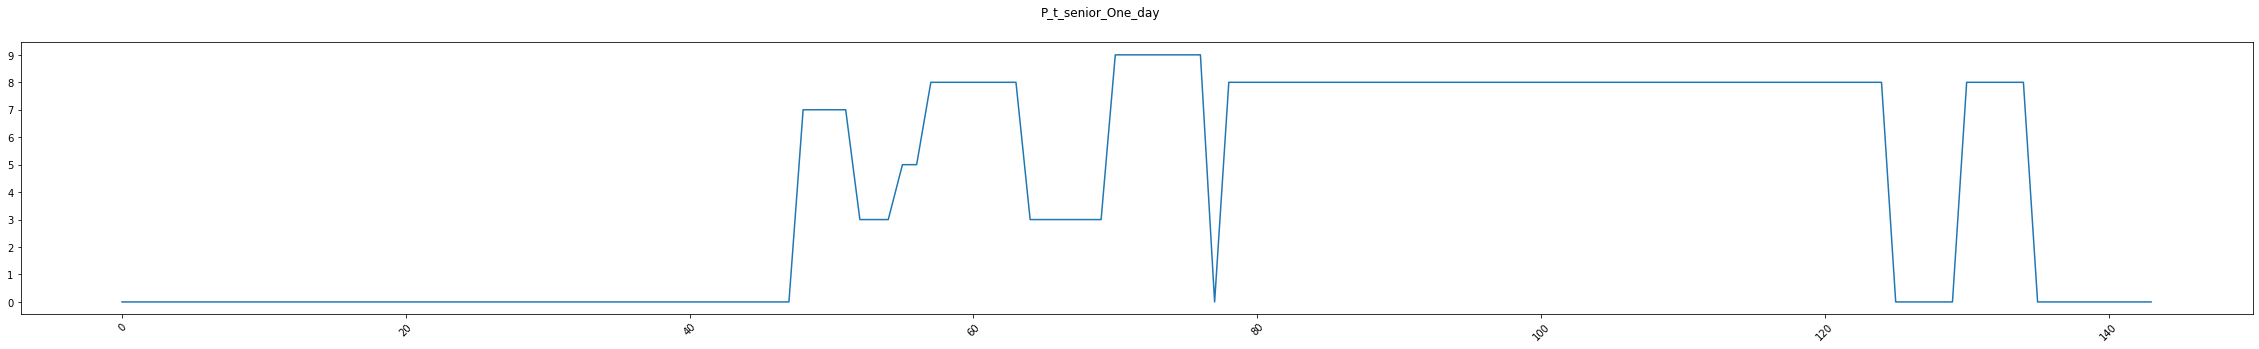

In [40]:
# SIMULATE ONE DAY
# note: at time it returns error because the sum of the row of P_t[t given] [j initial state] is not 1. 
# this shouldnt be possible. there must always be one state to move to (at least the same state!)
# how to catch why some lines at t = 0 are all zeros? 
i = 5

transitionMatrix = all_P_t[i]
title = all_P_t_labels[i]+'_One_day'
activityList = activity_forecast(transitionMatrix,0)
fig = plt.figure(figsize=(40, 5))
fig.suptitle(title)
#T = np.arange(144)
plt.plot(T, activityList)
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 10, 1))

#now = datetime.now()
dt_string = now.strftime("%d-%m-%Y_%H-%M-%S")
savelabel = dt_string+title
plt.savefig(savelabel+'.png')

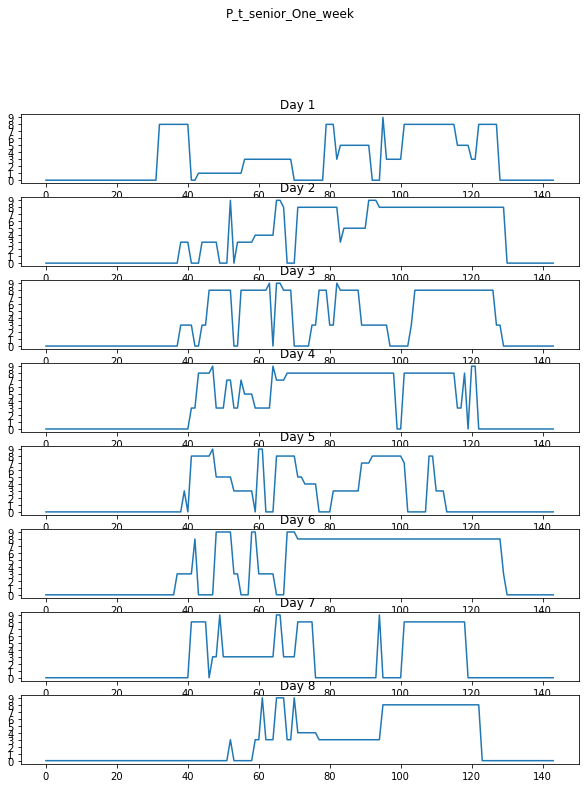

In [41]:
#SIMULATE MANY DAYS, in column
# To save every activityList
list_activity = []
count = 0

# lets simulate may days
for iterations in range(0,8):
        list_activity.append(activity_forecast(transitionMatrix,0))

fig = plt.figure(figsize=(10, 15))
title = all_P_t_labels[i]+'_One_week'
fig.suptitle(title )

counter = 1
for activityList in list_activity: 
    ax =  fig.add_subplot(10,1,counter)
    ax.set_title('Day %i '%counter)
    T = np.arange(144)
    plt.plot(T, activityList)
    plt.yticks(np.arange(0,10, 1))
    counter +=1
    
dt_string = now.strftime("%d-%m-%Y_%H-%M-%S")
savelabel = dt_string+title
plt.savefig(savelabel+'.png')

--- 3.5709786415100098 seconds ---


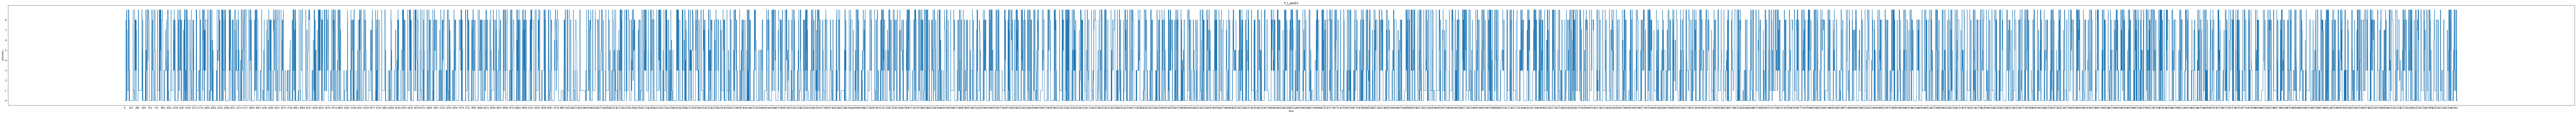

In [42]:
#SIMULATE MANY DAYS, in one time line
i = 3
numdays = 365
transitionMatrix = all_P_t[i]
title = all_P_t_labels[i]+'NumOfDays_'+str(numdays)

start_time = time.time()
activityList = ForecastandPlotAcitivtiesforNdays(transitionMatrix,i,0,numdays)
print("--- %s seconds ---" % (time.time() - start_time))

dt_string = now.strftime("%d-%m-%Y_%H-%M-%S")
savefig = dt_string+title
plt.savefig(savefig+'.png')

savelabel ='SimActivities_'+savefig+".csv"
with open( savelabel,'wb') as f:
    pickle.dump(activityList, f)

In [ ]:
os.getcwd()
os.chdir('C:\\Users\\arita\\Documents\\GitHub\\02443-SimSolarEnergy\\code\\activityLists')

In [45]:
#SIMULATE A FAMILY OF PEOPLE FOR N DAYS 
list_of_people = []
list_of_people.append(P_t_child)
#list_of_people.append(P_t_child)
#list_of_people.append(P_t_adult1)
#list_of_people.append(P_t_adult1)
#list_of_people.append(P_t_senior)

days = 365

start_time = time.time()
container_activityLists = SimulateActivitiesForThisListoFPeople(list_of_people,days)
print("--- %s seconds ---" % (time.time() - start_time))

dt_string = now.strftime("%d-%m-%Y_%H-%M-%S")
savelabel ='SimActivities_'+str(len(list_of_people))+'_People_'+'_NumOfDays_'+str(days)+".csv"
with open( savelabel,'wb') as f:
    pickle.dump(container_activityLists, f)

lets simulate a family of 1, for 365 days
--- 0.0002989768981933594 seconds ---


In [46]:
#SIMULATE TWO PERSONS FOR 365 DAYS 
list_of_people = [P_t_child,P_t_adult3]
#list_of_people.append(P_t_child)
#list_of_people.append(P_t_child)
#list_of_people.append(P_t_adult3)
#list_of_people.append(P_t_adult1)
#list_of_people.append(P_t_senior)

days = 365

start_time = time.time()
container_activityLists = SimulateActivitiesForThisListoFPeople(list_of_people,days)
print("--- %s seconds ---" % (time.time() - start_time))

dt_string = now.strftime("%d-%m-%Y_%H-%M-%S")
savelabel ='SimActivities_'+str(len(list_of_people))+'_People_'+'_NumOfDays_'+str(days)+".csv"
with open( savelabel,'wb') as f:
    pickle.dump(container_activityLists, f)

lets simulate a family of 2, for 365 days
--- 0.0008876323699951172 seconds ---


# Simulator 2, parameters: age, weekday

In [30]:
#even num --> weekdays
#uneven num --> weekend
i = 3
#print(P_t_labels[i])
#print(all_week_P_t[i])
#print("")
#print(all_week_test_df_labels[0])
#print(all_week_test_df[0])
P_t_labels

['P_t_traindf_adult1_weekdays',
 'P_t_traindf_adult1_weekend',
 'P_t_traindf_adult2_weekdays',
 'P_t_traindf_adult2_weekend',
 'P_t_traindf_adult3_weekdays',
 'P_t_traindf_adult3_weekend',
 'P_t_traindf_adult4_weekdays',
 'P_t_traindf_adult4_weekend',
 'P_t_traindf_child_weekdays',
 'P_t_traindf_child_weekend',
 'P_t_traindf_senior_weekdays',
 'P_t_traindf_senior_weekend']

In [31]:
def Simulate_forNweeks_ForListoFPeople(numWeeks,list_of_P_t, numdays):
    """
    list_of_P_t : as input we have a list of people aka a list of transition matrices
    each P_t per person weekdays has to be followed by respective weekend, eg:
    
                'P_t_traindf_adult1_weekdays',
                'P_t_traindf_adult1_weekend',
    numweeks: how many weeks we want to get
    """
    familysize = len(list_of_P_t)
    print ("lets simulate a family of %i, for %i days" %(familysize,numdays))
    
    #container to get the activitylist of each family member
    container_activityLists = [[] for i in range(familysize)]
    i = 0
    while i <= (len(familysize)-1):
        transitionMatrix = list_of_P_t[i]
        ransitionMatrix_weekdays,transitionMatrix_weekenddays = list_of_P_t[i],list_of_P_t[i+1]
        
        activityToday = 0
        
        #get the activities simulated according to the right transition Matrix
        activityList = ForecastAndPlot_forNweeks(numWeeks,transitionMatrix_weekdays,transitionMatrix_weekenddays,activityToday, weekdays =5,weekenddays = 2)
        
        #add them to the container
        container_activityLists[i]= (activityList)
        i +=2
    
    return container_activityLists
    
def ForecastAndPlot_forNweeks(numWeeks,transitionMatrix_weekdays,transitionMatrix_weekenddays,activityToday = 0, weekdays =5,weekenddays = 2, PlotEachWeek = False):
    #get the sim activity list
    #this list is 144*numdays
    activityList = []
    for w in range((numWeeks)):
        newactivityList = weekly_activity_forecast(transitionMatrix_weekdays,transitionMatrix_weekenddays,activityToday, weekdays,weekenddays)

        if PlotEachWeek == True:
         #plot it # the rientrance is the difference btw one plot per week or one huge big plot
          plot_lenght = numWeeks*15
          plot_height = 4
          if plot_lenght>200:
              plot_lenght= 200
              plot_height = 8
          figure(figsize=(plot_lenght,plot_height))
          title = P_t_labels[i]
          title =title[:-9]
          titlelabel = title+'_'+str(numWeeks)+'_week'
          fig.suptitle(titlelabel)
          T = np.arange(len(newactivityList))
          plt.plot(T, newactivityList)
          plt.title(titlelabel)
          plt.xlabel('time')
          plt.ylabel('activities')
          plt.xticks(np.arange(min(T), max(T)+1, 143))
          plt.yticks(np.arange(0, 10, 1))
        
        activityList = activityList+newactivityList
    
    #plot one huge big plot
    plot_lenght = numWeeks*15
    plot_height = 4
    if plot_lenght>200:
        plot_lenght= 200
        plot_height = 8

    figure(figsize=(plot_lenght,plot_height))

    title = P_t_labels[i]
    title =title[:-9]
    titlelabel = title+'_'+str(numWeeks)+'_week'

    T = np.arange(len(activityList))

    plt.plot(T, activityList)
    plt.title(titlelabel)
    plt.xlabel('time')
    plt.ylabel('activities')
    plt.yticks(np.arange(0, 10, 1))
    
    return activityList

#main
def weekly_activity_forecast(transitionMatrix_weekdays,transitionMatrix_weekenddays,activityToday = 0, weekdays =1,weekenddays = 1,time_steps = 144):
    
    # Choose the starting state
    #activityToday = random.choice(states_id1)

    #anyhow append in the activity list
    activityList = [activityToday]
    
    #SIM WEEK-DAY(S)
    for day in range(weekdays):
        if day == 0:
          start = 1
        else:
          start = 0
        for t in range(start,time_steps):
          if (sum(transitionMatrix_weekdays[t][activityToday]) == 0):
            activityList.append(activityToday) 
          else:
            change = np.random.choice(transition_array[activityToday],replace=True,p=transitionMatrix_weekdays[t][activityToday])
            next_state = takeSecNum(change)
            activityToday = next_state
            activityList.append(next_state)
                        
    activityToday = 0
    activityList.append(activityToday)   
                   
    #SIM WEEKEND-DAY(S)                    
    for day in range(weekenddays):
        if day == 0:
          start = 1
        else:
          start = 0
        for t in range(start,time_steps):
          if (sum(transitionMatrix_weekenddays[t][activityToday]) == 0):
              activityList.append(activityToday)                                        
          else:
              change = np.random.choice(transition_array[activityToday],replace=True,p=transitionMatrix_weekenddays[t][activityToday])
              next_state = takeSecNum(change)
              activityToday = next_state
              activityList.append(next_state)
    
    
    return activityList

*  'P_t_traindf_adult1_weekdays',
*  'P_t_traindf_adult1_weekend',
*  'P_t_traindf_adult2_weekdays',
*  'P_t_traindf_adult2_weekend',
*  'P_t_traindf_adult3_weekdays',
*  'P_t_traindf_adult3_weekend',
*  'P_t_traindf_adult4_weekdays',
*  'P_t_traindf_adult4_weekend',
*   'P_t_traindf_child_weekdays',
*   'P_t_traindf_child_weekend',
*   'P_t_traindf_senior_weekdays',
*   'P_t_traindf_senior_weekend']

In [32]:
T = time_converter_df['New_Time'].tolist()
#len(T*2)
#min(T)
#max(T)

In [33]:
os.getcwd()

'/content/drive/My Drive/02443-Stochastic Simulation/Project/data_stochastic_modeling'

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


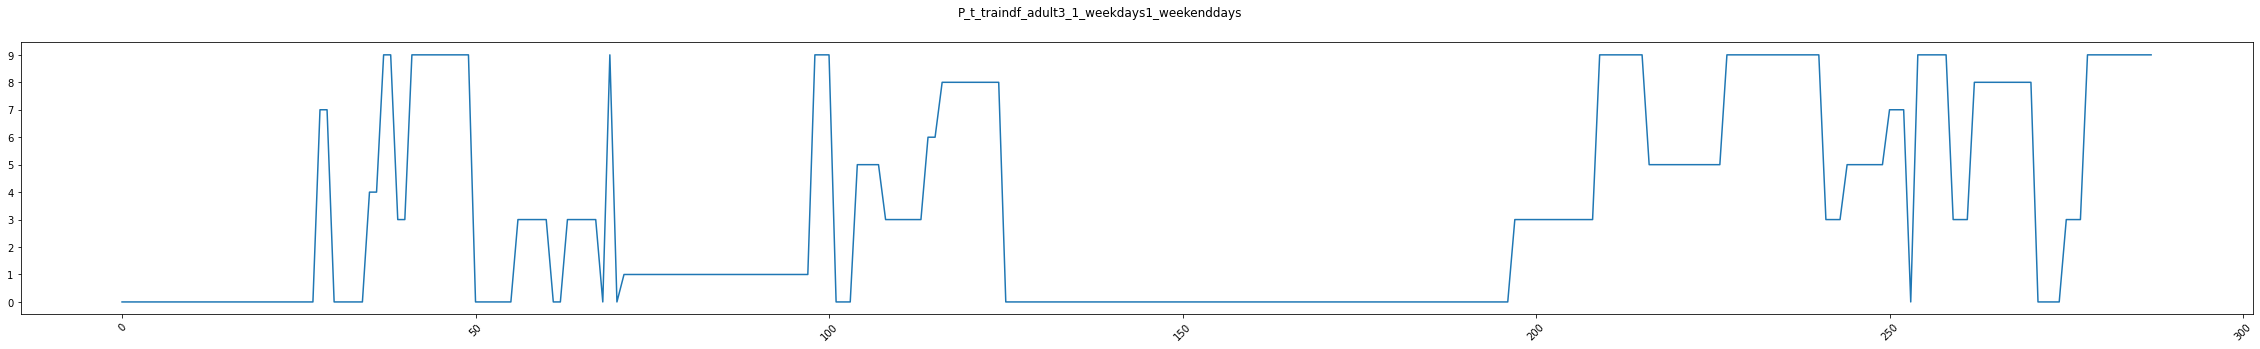

In [34]:
#sim one weekday and one weekend day for person
i = 4
transitionMatrix_weekdays = all_week_P_t[i]
transitionMatrix_weekenddays = all_week_P_t[i+1]

title = P_t_labels[i]
title =title[:-9]

weekdays =1
weekenddays = 1

activityList = weekly_activity_forecast(transitionMatrix_weekdays,transitionMatrix_weekenddays,0,weekdays,weekenddays )
fig = plt.figure(figsize=(40, 5))

titlelabel = title+'_'+str(weekdays)+'_weekdays'+str(weekenddays)+'_weekenddays'
fig.suptitle(titlelabel)

#T = time_converter_df['New_Time'].tolist() # this shall be len(T)=144
T = np.arange(144*(weekdays+weekenddays))
#T = (T*(weekdays+weekenddays))

plt.plot(T, activityList)
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 10, 1))

#os.chdir('C:\\Users\\arita\\Documents\\GitHub\\02443-SimSolarEnergy\\code\\figures\\')
root = "C:/Users/arita/Documents/private/Data Engineering/2semestre/Stochastic_modeling/Project/plots_images_graphs"
now = datetime.now()
dt_string = now.strftime("%d-%m-%Y_%H-%M-%S")
savelabel = dt_string+title+'_'+str(weekdays)+'_weekdays'+str(weekenddays)+'_weekenddays'
plt.savefig(savelabel+'.png')

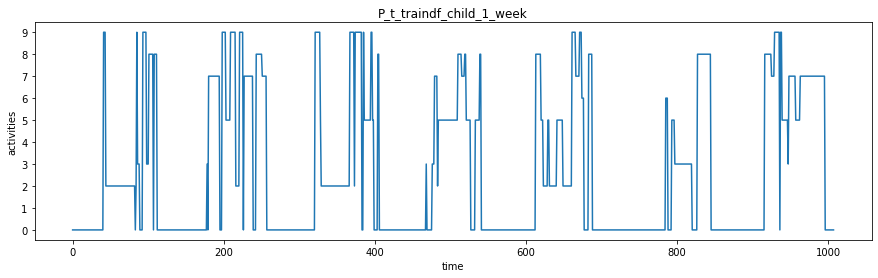

In [48]:
#sim one week for person
i = 8
transitionMatrix_weekdays = all_week_P_t[i]
transitionMatrix_weekenddays = all_week_P_t[i+1]

title = P_t_labels[i]
title =title[:-9]

numWeeks =1

activityList = ForecastAndPlot_forNweeks(numWeeks,transitionMatrix_weekdays,transitionMatrix_weekenddays,activityToday = 0)

#os.chdir('C:\\Users\\arita\\Documents\\GitHub\\02443-SimSolarEnergy\\code\\figures\\')
#root = "C:/Users/arita/Documents/private/Data Engineering/2semestre/Stochastic_modeling/Project/plots_images_graphs"
now = datetime.now()
dt_string = now.strftime("%d-%m-%Y_%H-%M-%S")
savelabel = dt_string+title+'_'+str(numWeeks)+'_weeks'
plt.savefig(savelabel+'.png')

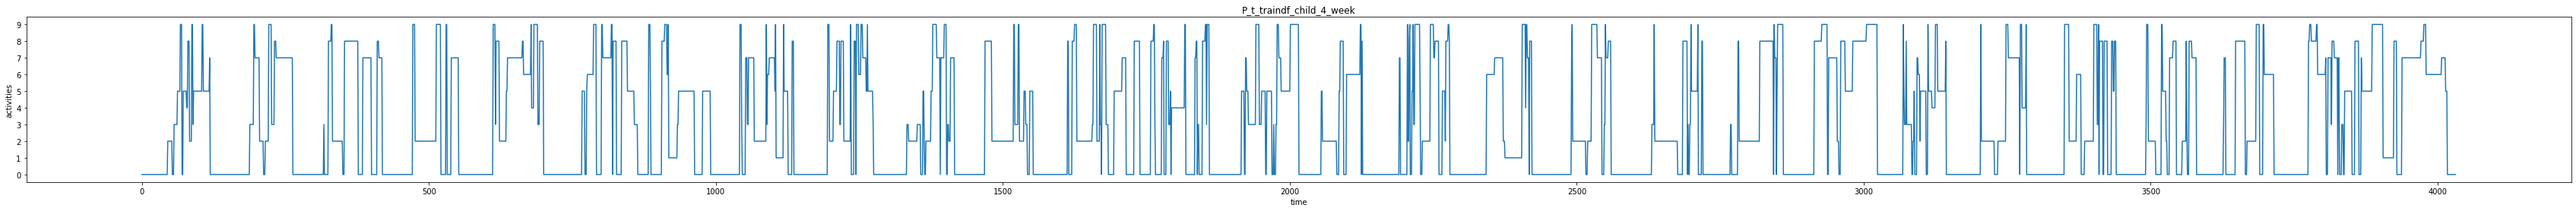

In [47]:
#sim one month 
i = 8
transitionMatrix_weekdays = all_week_P_t[i]
transitionMatrix_weekenddays = all_week_P_t[i+1]

title = P_t_labels[i]
title =title[:-9]

numWeeks =4

activityList = ForecastAndPlot_forNweeks(numWeeks,transitionMatrix_weekdays,transitionMatrix_weekenddays,activityToday = 0)

#os.chdir('C:\\Users\\arita\\Documents\\GitHub\\02443-SimSolarEnergy\\code\\figures\\')
#root = "C:/Users/arita/Documents/private/Data Engineering/2semestre/Stochastic_modeling/Project/plots_images_graphs"
now = datetime.now()
dt_string = now.strftime("%d-%m-%Y_%H-%M-%S")
savelabel = dt_string+title+'_'+str(numWeeks)+'_weeks'
plt.savefig(savelabel+'.png')

# Validation

In order to validate our model, we take the test sets that we had built previously with sklearn.model_selection, train_test_split.

We will try to predict the next activity of activities that were not in the "training set" used to build the transition matrices.

In [41]:
def validate(TEST_df_test,counter):
    TEST_df_test["Current_Activity_short"] = TEST_df_test["whatdoing_exact"].apply(keepOne)
    TEST_df_test["Next_Activity_short"] = TEST_df_test["Next_activity"].apply(keepOne)
    
    predicted_next_activities = []
    for i in range(len(TEST_df_test["Next_Activity_short"])):

        transitionMatrix = all_P_t[counter] 
        namemod = all_P_t_labels[counter] 
        currentactivity = TEST_df_test["Current_Activity_short"][i]
        days =1
        time_steps = 1 # we want only to predict ONE step ahead

        #activity_forecast(transitionMatrix,currentactivity = 0, days =1,time_steps = 144):
        nextactivity = activity_forecast(transitionMatrix,currentactivity,days,time_steps)
        predicted_next_activities.append(nextactivity)
        
    validation = [] # 1 for same, zero for different
    for i in range(len(TEST_df_test["Next_Activity_short"])):
        real_next_activity = TEST_df_test["Next_Activity_short"][i]
        predicted_next_activity = predicted_next_activities[i]
        if (real_next_activity == predicted_next_activity):
            validation.append(1)
        else: 
            validation.append(0)
    correct_predictions = sum(validation)
    tot_predictions = len(validation)
    indices_of_wrong_prediction = [i for i, x in enumerate(validation) if x == 0]
    print ("overall the model of %s was able to predict correctly %.4f percent of the next actions" %(namemod,correct_predictions*100/tot_predictions))    
    
    return predicted_next_activities,validation

def validate_weekly(TEST_df_test,counter):
    #print (len(TEST_df_test))
    TEST_df_test["Current_Activity_short"] = TEST_df_test["whatdoing_exact"].apply(keepOne)
    TEST_df_test["Next_Activity_short"] = TEST_df_test["Next_activity"].apply(keepOne)
    
    predicted_next_activities = []
    for i in range(len(TEST_df_test["Next_Activity_short"])):

        transitionMatrix = all_week_P_t[counter] 
        namemod = P_t_labels[counter]
        
        currentactivity = TEST_df_test["Current_Activity_short"][i]
        days =1
        time_steps = 1 # we want only to predict ONE step ahead

        #activity_forecast(transitionMatrix,currentactivity = 0, days =1,time_steps = 144):
        nextactivity = activity_forecast(transitionMatrix,currentactivity,days,time_steps)
        predicted_next_activities.append(nextactivity)
        
    validation = [] # 1 for same, zero for different
    for i in range(len(TEST_df_test["Next_Activity_short"])):
        real_next_activity = TEST_df_test["Next_Activity_short"][i]
        predicted_next_activity = predicted_next_activities[i]
        if (real_next_activity == predicted_next_activity):
            validation.append(1)
        else: 
            validation.append(0)
    correct_predictions = sum(validation)
    tot_predictions = len(validation)
    indices_of_wrong_prediction = [i for i, x in enumerate(validation) if x == 0]
    print ("overall the model of %s was able to predict correctly %.4f percent of the next actions" %(namemod,correct_predictions*100/tot_predictions))    
    
    return predicted_next_activities,validation

## Validation Sim1

In [48]:
#all_test_df = [test_df_child,test_df_adult1,test_df_adult2,test_df_adult3,test_df_adult4,test_df_senior]
#all_test_df_labels = ['test_df_child','test_df_adult1','test_df_adult2','test_df_adult3','test_df_adult4','test_df_senior']

In [49]:
container_predicted_next_activities = [[] for i in range(len(all_test_df))]
container_validation = [[] for i in range(len(all_test_df))]

counter = 0
for test_df in all_test_df:
    predicted_next_activities,validation = validate(test_df,counter)
    container_predicted_next_activities[counter]= (predicted_next_activities)
    container_validation[counter]= (validation)
    counter += 1
    

overall the model of P_t_child was able to predict correctly 89.7014 percent of the next actions
overall the model of P_t_adult1 was able to predict correctly 89.4132 percent of the next actions
overall the model of P_t_adult2 was able to predict correctly 88.0807 percent of the next actions
overall the model of P_t_adult3 was able to predict correctly 87.9389 percent of the next actions
overall the model of P_t_adult4 was able to predict correctly 86.3409 percent of the next actions
overall the model of P_t_senior was able to predict correctly 86.9054 percent of the next actions


## Validation Sim2

In [49]:
container_predicted_next_activities = [[] for i in range(len(all_week_test_df))]
container_validation = [[] for i in range(len(all_week_test_df))]

counter = 0
for test_df in all_week_test_df:
    predicted_next_activities,validation = validate_weekly(test_df,counter)
    container_predicted_next_activities[counter]= (predicted_next_activities)
    container_validation[counter]= (validation)
    counter += 1
    

overall the model of P_t_traindf_adult1_weekdays was able to predict correctly 89.3927 percent of the next actions
overall the model of P_t_traindf_adult1_weekend was able to predict correctly 89.3732 percent of the next actions
overall the model of P_t_traindf_adult2_weekdays was able to predict correctly 88.2050 percent of the next actions
overall the model of P_t_traindf_adult2_weekend was able to predict correctly 87.6764 percent of the next actions
overall the model of P_t_traindf_adult3_weekdays was able to predict correctly 87.9232 percent of the next actions
overall the model of P_t_traindf_adult3_weekend was able to predict correctly 87.7343 percent of the next actions
overall the model of P_t_traindf_adult4_weekdays was able to predict correctly 86.6656 percent of the next actions
overall the model of P_t_traindf_adult4_weekend was able to predict correctly 86.7100 percent of the next actions
overall the model of P_t_traindf_child_weekdays was able to predict correctly 89.790

## Mismatch analysis

### One single example 

In [50]:
TEST_df_test = test_df_child
#print(TEST_df_test.columns)
TEST_df_test["Current_Activity_short"] = TEST_df_test["whatdoing_exact"].apply(keepOne)
TEST_df_test["Next_Activity_short"] = TEST_df_test["Next_activity"].apply(keepOne)
print(TEST_df_test["Next_Activity_short"][1])
print(len(TEST_df_test["Next_Activity_short"]))
print(len(TEST_df_test["Current_Activity_short"]))

8
64640
64640


In [51]:
predicted_next_activities = []
for i in range(len(TEST_df_test["Next_Activity_short"])):
    
    transitionMatrix = all_P_t[0] #P_t_child
    currentactivity = TEST_df_test["Current_Activity_short"][i]
    days =1
    time_steps = 1 # we want only to predict ONE step ahead

    #activity_forecast(transitionMatrix,currentactivity = 0, days =1,time_steps = 144):
    nextactivity = activity_forecast(transitionMatrix,currentactivity,days,time_steps)
    predicted_next_activities.append(nextactivity)

In [52]:
# check how was the prediction!
validation = [] # 1 for same, zero for different
for i in range(len(TEST_df_test["Next_Activity_short"])):
    real_next_activity = TEST_df_test["Next_Activity_short"][i]
    predicted_next_activity = predicted_next_activities[i]
    if (real_next_activity == predicted_next_activity):
        validation.append(1)
    else: 
        validation.append(0)
correct_predictions = sum(validation)
tot_predictions = len(validation)
indices_of_wrong_prediction = [i for i, x in enumerate(validation) if x == 0]
print ("overall the model was able to predict correctly %.2f percent of the next actions" %(correct_predictions*100/tot_predictions))

        
    

overall the model was able to predict correctly 89.70 percent of the next actions


### check on the mistakes made

In [53]:
correct_predictions

57983

In [54]:
tot_predictions

64640

In [58]:
for i in indices_of_wrong_prediction:
    curra = TEST_df_test["Current_Activity_short"][i]
    nexta = TEST_df_test["Next_Activity_short"][i]
    preda = predicted_next_activities[i][0]
    #if (preda != curra):
    print ("wrongly predicted index: %i" %i)
    print (TEST_df_test.loc[i,:])
    print ("Next activity: %s; Predicted: %s" %(nexta,preda))
    print ("")

Streaming output truncated to the last 5000 lines.
old_time_index                         269593
person_id                         1.52912e+07
serial                               15291207
pnum                                        1
Date                               2015-02-20
Season                                 winter
day_of_week                            Friday
New_Time                             16:10:00
time_period                                97
whatdoing_exact                           210
sex                                         1
age                                        15
t_start                   2015-02-20 16:00:00
Next_activity                            7330
Current_Activity_short                      0
Next_Activity_short                         7
Name: 62344, dtype: object
Next activity: 7; Predicted: 0

wrongly predicted index: 62367
old_time_index                          79105
person_id                         1.20902e+07
serial                         

In [57]:
for i in range(len(validation)):
    curra = TEST_df_test["Current_Activity_short"][i]
    nexta = TEST_df_test["Next_Activity_short"][i]
    preda = predicted_next_activities[i][0]
    if (preda != curra) & (preda == nexta):
        print ("%i Current activity: %s;  Next activity: %s;  Predicted: %s" %(i, curra, nexta,preda))
        print ("")
    

it has issues in predicting unusual trasitions from one state to a different one.

# Simulator 3: power directly

In [61]:
table_activity_power = loadCSV('activity_code.csv',folder)
table_activity_power['a2p_per10minutes']= table_activity_power.a2p/6
table_activity_power

loading:  /content/drive/My Drive/02443-Stochastic Simulation/Project/data_stochastic_modeling/activity_code.csv


,code,activity,a2p,a2p_per10minutes
0,0,personal-care,0.01,0.001667
1,1,employment,4.00,0.666667
2,2,study,3.00,0.500000
3,3,household-care,2.00,0.333333
4,4,volunteer-work,3.50,0.583333
5,5,entertainment,5.00,0.833333
6,6,outdoor-activity,1.00,0.166667
7,7,hobbies,2.50,0.416667
8,8,media,5.50,0.916667
9,9,travel,1.50,0.250000


In [64]:
def SimulatePowerForList(list_of_P_t, numdays,col):
    """
    list_of_P_t : as input we have a list of people aka a list of transition matrices
                    this is eg to rapresent an household of two kids, two adults 30-45 and one adult >75
    numdays: how many days we want to get
    """
    population_size = len(list_of_P_t)
    print ("lets simulate a family of %i, for %i days" %(population_size,numdays))
    
    #container to get the activitylist of each family member
    container_powerList = [[] for i in range(population_size)]
    
    for i in range(population_size):
        transitionMatrix = list_of_P_t[i]
        activityToday = 0
        
        #get the activities simulated according to the right transition Matrix
        powerList = power_forecast(transitionMatrix,col,activityToday, numdays)
        
        #add them to the container
        container_powerList[i]= (powerList)
        if (i%10 == 0):
          print (i)
    
    return container_powerList


#main
def power_forecast(transitionMatrix,col, activityToday = 0, days =1,time_steps = 144):
  """
  col = column with a2p values
  """
  # Choose the starting state
  #activityToday = random.choice(states_id1)
  
  #anyhow append in the activity list
  powerList = []
  activityList = [activityToday]
  power = table_activity_power.a2p_per10minutes[activityToday]
  powerList.append(power)
  
  for day in range(days):
      if day == 0:
        start = 1
      else:
        start = 0
      for t in range(start,time_steps):
        if (sum(transitionMatrix[t][activityToday]) == 0):
            activityList.append(activityToday) 
    
        else:
            change = np.random.choice(transition_array[activityToday],replace=True,p=transitionMatrix[t][activityToday])
            next_state = takeSecNum(change)
            activityToday = next_state
            activityList.append(activityToday)

        powerList.append(col[activityToday])
  return powerList

#Demographic of Alice Spring
df_child = 6606

df_adult1 =3468

df_adult2 = 5778

df_adult3 = 5498

df_adult4 = 2731

df_senior = 658

### Due to time/computation constraints we model 1/12 of it: 

df_child = 551  ---> 4393.8361 sec  

df_adult1 = 289  ---> 2052.6376

df_adult2 = 482  --->3773.2269

df_adult3 = 458  --->3606.7041

df_adult4 = 228  --->

df_senior = 55  --->


In [66]:
# time test 
list_of_people = [P_t_adult3]*1
col = table_activity_power.a2p_per10minutes
days = 365

start_time = time.time()
container_powLists = SimulatePowerForList(list_of_people,days,col)
print (len(container_powLists[0]))
print("--- %s seconds ---" % (time.time() - start_time))

lets simulate a family of 1, for 365 days
0
52560
--- 5.631822109222412 seconds ---


In [ ]:
# how long will it take to calculate all ? 

In [ ]:
#SIMULATE A CITY OF PEOPLE FOR N DAYS 
name ='P_t_senior_'
list_of_people = [P_t_senior]*55

days = 365

start_time = time.time()
container_PowLists = SimulatePowerForList(list_of_people,days,col)
print("--- %s seconds ---" % (time.time() - start_time))

dt_string = now.strftime("%d-%m-%Y_%H-%M-%S")
savelabel ='SimPower_'+name+str(len(list_of_people))+'_People_'+'_NumOfDays_'+str(days)+".csv"
with open( savelabel,'wb') as f:
    pickle.dump(container_PowLists, f)


lets simulate a family of 55, for 365 days
0
10
20
30
40


In [ ]:
--- 3773.2268974781036 seconds --- adult2
--- 3606.70415019989 seconds ---  adult3
--- 3606.70415019989 seconds --- child